In [90]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import scipy.signal
import soundfile as sp
import librosa
import librosa.display
from IPython.display import HTML
import IPython.display as ipd
import matplotlib.animation as animation
from sklearn.decomposition import  PCA,TruncatedSVD,FastICA
from inaSpeechSegmenter import Segmenter
from inaSpeechSegmenter.export_funcs import seg2csv, seg2textgrid
from utils import Preprocessing,Animation
from utils import Visualize
from dataloader import DataLoader
import random
import os
import config
from  pathlib  import Path 
print("tensorflow version" ,tf.__version__)
device = tf.config.list_physical_devices()[-1]

tensorflow version 2.6.0


In [108]:
def applyfilter(y, pt = 0.1):
    # apply a 3-pole lowpass filter at 0.1x Nyquist frequency
    b, a = scipy.signal.butter(3, pt, 'low')
    filtered = scipy.signal.filtfilt(b, a, y ,method="gust")
    return filtered

In [103]:
scipy.signal.filtfilt??

In [4]:
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = 12
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

#We are initializing the experiment being analyzed
exp = config.experiment["NAME"]

In [6]:
pp =  Preprocessing(config.data['OUT_PATH'])

df =  pp.get_files()

# load some test data for demonstration and plot a wireframe
dl = DataLoader(config.data['file_path'],keepdims=True, crop_dims= (128,128) )
dl.load()

500 files read successfully
5248  1 second audio samples created successfully


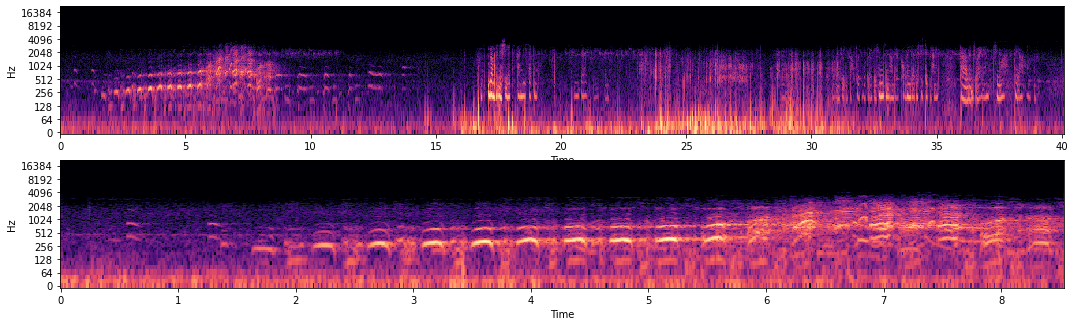

In [109]:
p = '/net/projects/scratch/winter/valid_until_31_July_2022/ybrima/data/Full_Data/Converted/PAN'
pp = '/net/projects/scratch/winter/valid_until_31_July_2022/ybrima/data/Full_Data/Cleaned/PAN'
files =  [f'{p}/{f}' for f in os.listdir(p)]
f = random.choice(files)
ff =  f'{pp}/{Path(f).name}'
y, sr =  librosa.load(f, sr = None)
yy, sr =  librosa.load(ff, sr = None)
# y = random.choice(dl.Z)
D = librosa.stft(applyfilter(y),hop_length=config.audio['HOP_LENGTH'], n_fft= config.audio['FRAME_LENGHT'])
D_scaled =  np.abs(D)**2
plt.figure(1, figsize=(18,8))
plt.subplot(311)
S_db = librosa.power_to_db(D_scaled, ref=np.max)
librosa.display.specshow(S_db,sr=config.audio['SAMPLE_RATE'],hop_length=config.audio['HOP_LENGTH'], x_axis='time', y_axis='log')
plt.subplot(312)
D = librosa.stft(yy,hop_length=config.audio['HOP_LENGTH'], n_fft= config.audio['FRAME_LENGHT'])
D_scaled =  np.abs(D)**2
S_db = librosa.power_to_db(D_scaled, ref=np.max)
librosa.display.specshow(S_db,sr=config.audio['SAMPLE_RATE'],hop_length=config.audio['HOP_LENGTH'], x_axis='time', y_axis='log')
# plt.subplot(313)
# mfcc = librosa.feature.mfcc(y= y,sr = config.audio['SAMPLE_RATE'],n_fft= config.audio['FRAME_LENGHT'], hop_length=config.audio['HOP_LENGTH'])
# librosa.display.specshow(mfcc,sr=config.audio['SAMPLE_RATE'],hop_length=config.audio['HOP_LENGTH'], x_axis='time', y_axis='log')
plt.show()

In [101]:
len(yy), len(y)

(403074, 754880)

In [111]:
ipd.Audio(ff, rate = config.audio['SAMPLE_RATE'])

In [98]:
# seg = Segmenter()
# segmentation =  seg(Path(f))
# segmentation

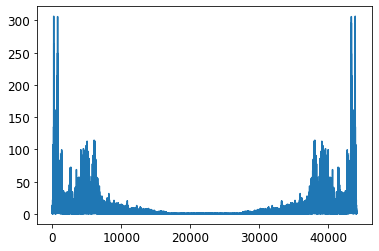

In [70]:
mag =  np.abs(np.fft.fft(y))
freq =  np.linspace(0, config.audio['SAMPLE_RATE'], len(y))
plt.plot(freq, mag)

In [36]:
sp.write('hello.wav',random.choice(dl.Z),config.audio['SAMPLE_RATE'])
ipd.Audio('hello.wav', rate = config.audio['SAMPLE_RATE'])

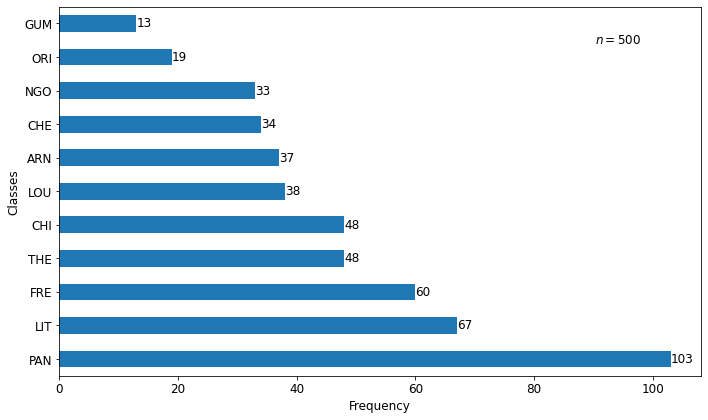

In [39]:
viz =  Visualize(config.figures['figpath'])
viz.show_distribution(df,save=True,filename=f'Data_Distribution_{exp}', figsize=(10,6))

In [40]:
n =  6
idx = np.random.randint(0, dl.X.shape[0], n)

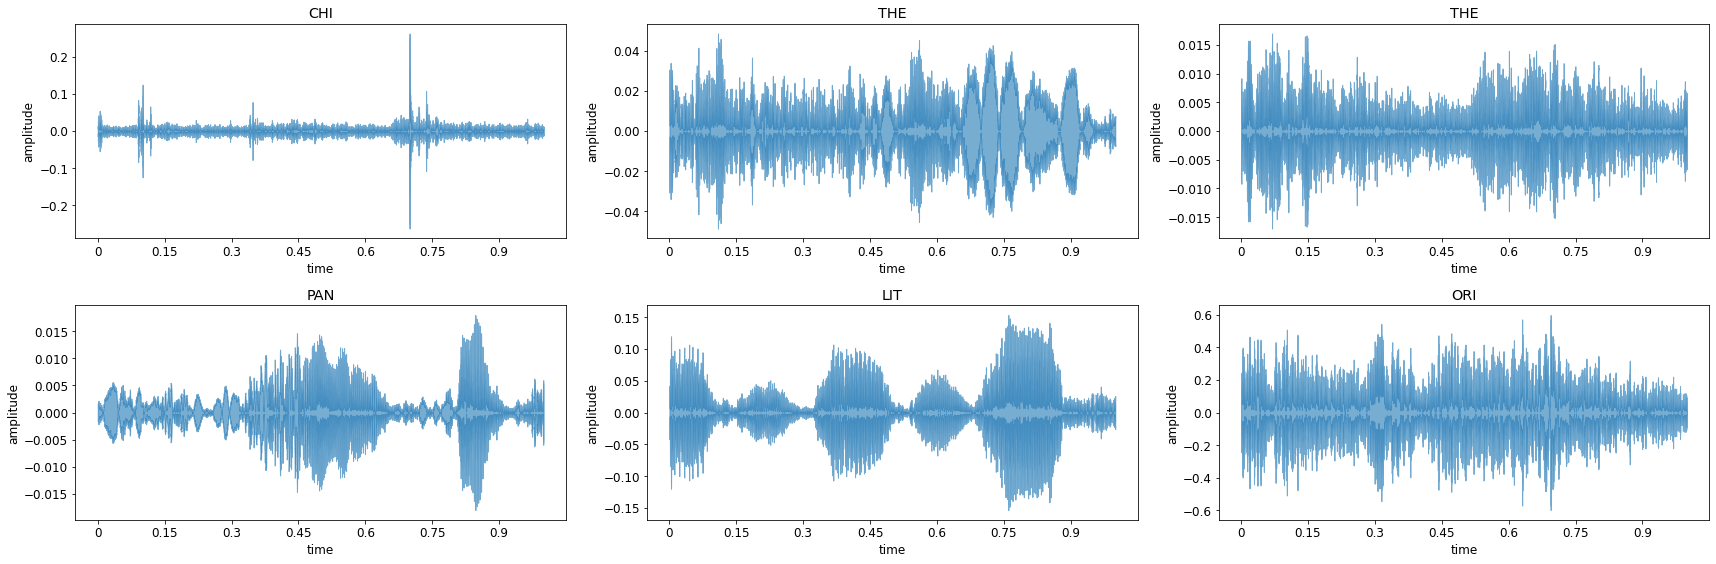

In [41]:
viz.display(dl.X,dl.Z,dl.y,dl.CLASSES,idx,filename=f'Sample_Waveplot_{exp}.png')

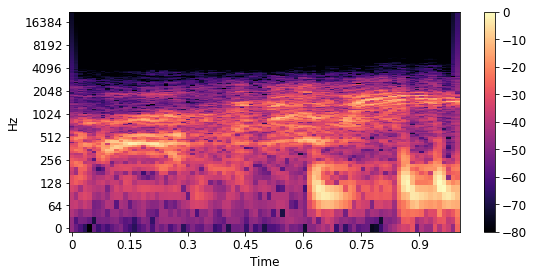

In [42]:
plt.figure(figsize=(8, 4))
librosa.display.specshow(random.choice(dl.X),y_axis='log', x_axis='time', sr=config.audio['SAMPLE_RATE'])
plt.colorbar()
plt.tight_layout()

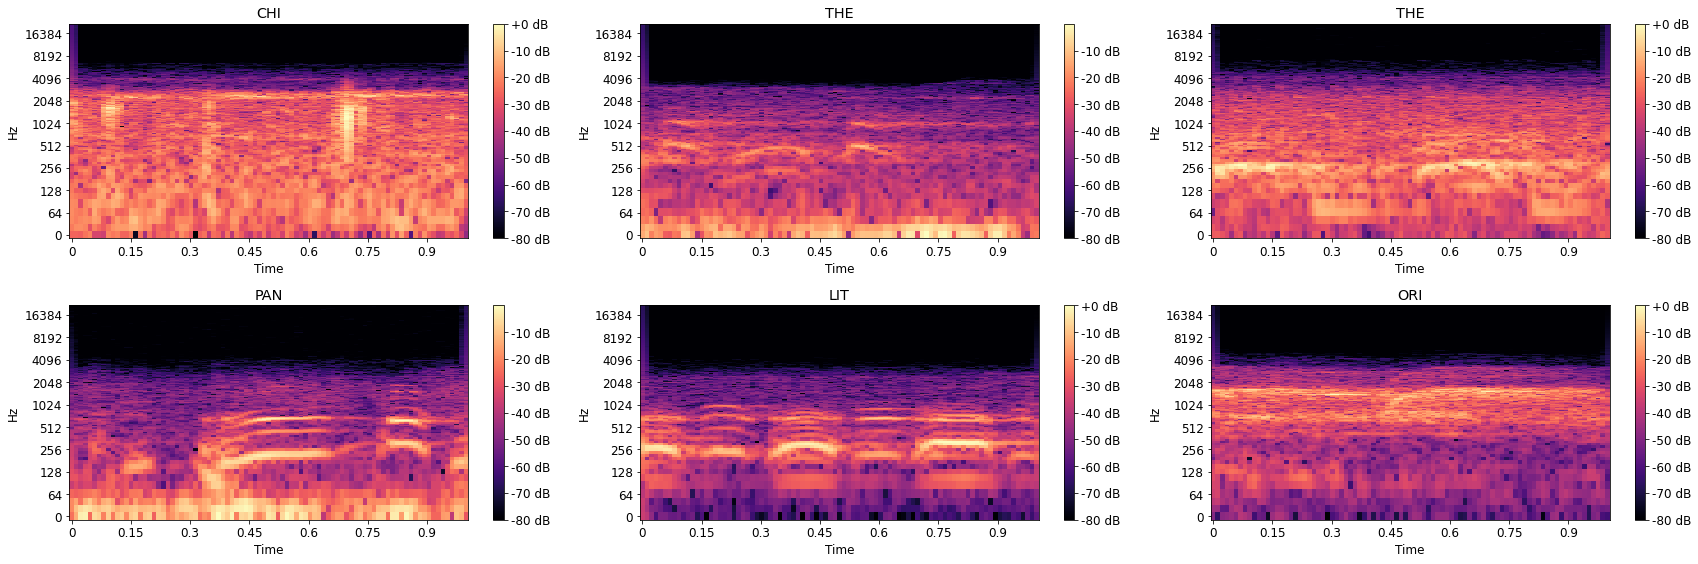

In [43]:
viz.display(dl.X,dl.Z,dl.y,dl.CLASSES,idx, flag=True,filename=f'UnNormalized_Frequency_Spectogram_{exp}.png')

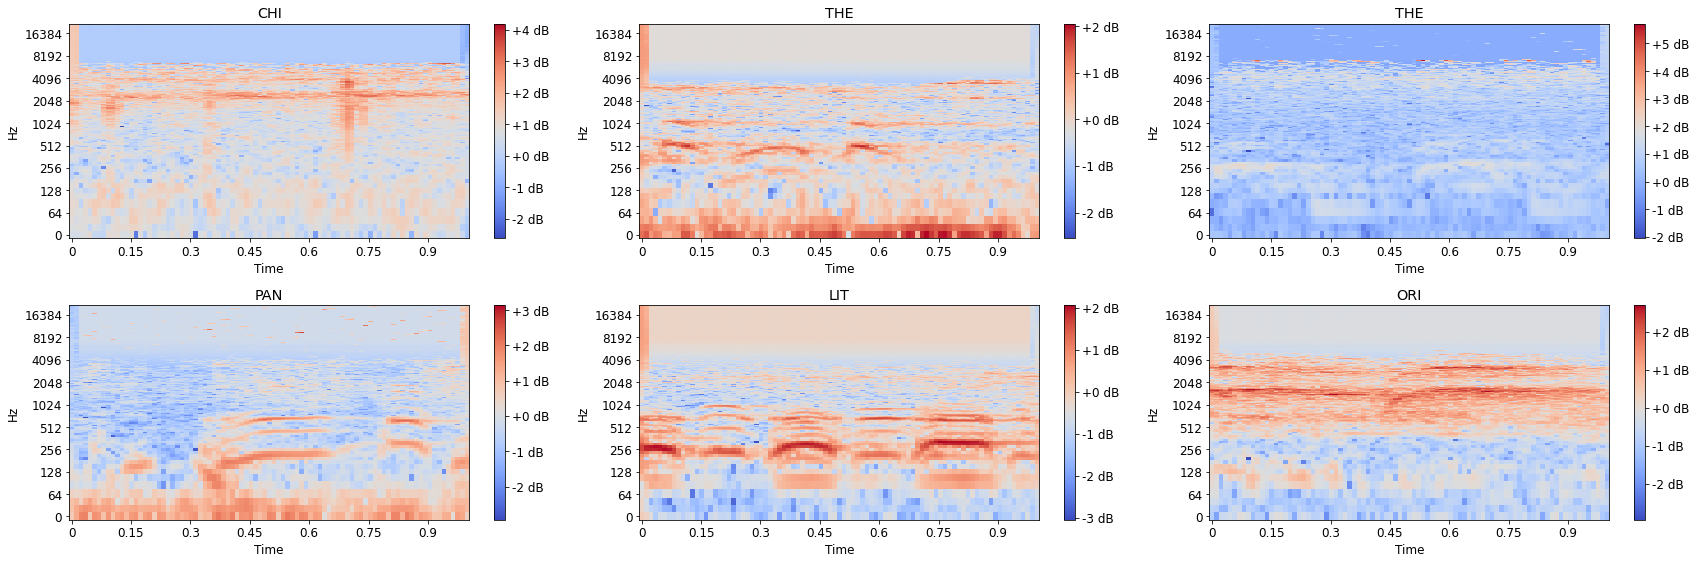

In [44]:
viz.display(dl.X_,dl.Z,dl.y,dl.CLASSES,idx, flag=True, save=True, filename=f'Normalized_Frequency_Spectogram_{exp}.png')

In [45]:
dl.project3D(PCA, n_components = 3)

 Successfully projected 1025 to 3 dimensions using PCA


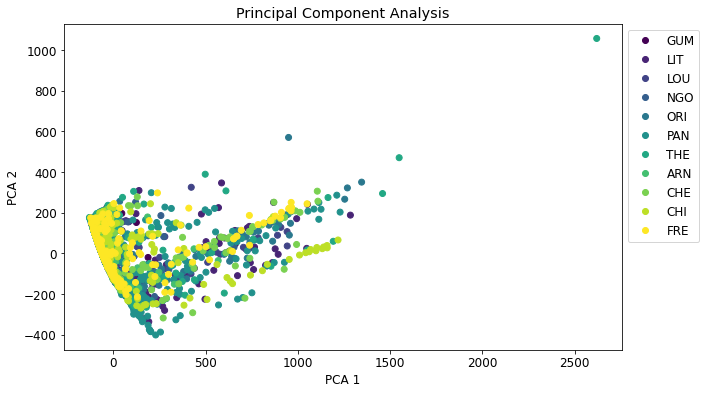

In [46]:
viz.plot_components(dl.X_projection,dl.y,dl.CLASSES,x_str='PCA 1', y_str='PCA 2', str_title="Principal Component Analysis", title=f"Normalized_PCA_{exp}.png")

In [12]:
dl.project3D(TruncatedSVD, n_components = 3)

 Successfully projected 1025 to 3 dimensions using Tru


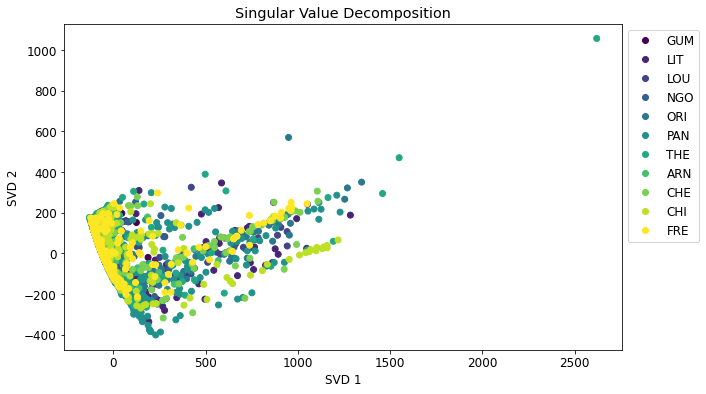

In [13]:
viz.plot_components(dl.X_projection,dl.y,dl.CLASSES,x_str='SVD 1', y_str='SVD 2', str_title="Singular Value Decomposition", title=f"Normalized_SVD_{exp}.png")

In [14]:
dl.project3D(FastICA, n_components = 3)

 Successfully projected 1025 to 3 dimensions using Fas


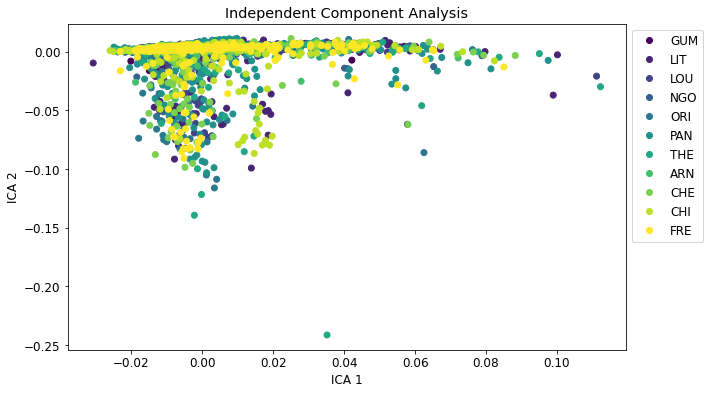

In [15]:
viz.plot_components(dl.X_projection,dl.y,dl.CLASSES,x_str='ICA 1', y_str='ICA 2', str_title="Independent Component Analysis", title=f"Normalized_ICA_{exp}.png")

In [30]:
dl.project3D(FastICA, n_components = 3)

 Successfully projected 128 to 3 dimensions using Fas


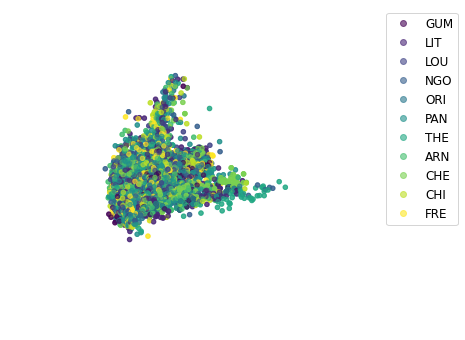

In [31]:
fig = plt.figure(1,figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.set_axis_off()

def init():
    scatter = ax.scatter(dl.X_projection[:,0], dl.X_projection[:,1], dl.X_projection[:,2], c=list(dl.y),marker='o', s=20, alpha=0.6)
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_zlabel("$x_3$")
    ax.legend(handles=scatter.legend_elements()[0], labels=dl.CLASSES,bbox_to_anchor=(1.4, 1.0))
    return fig,

def animate(i):
    ax.view_init(elev=30., azim=3.6*i)
    return fig,

# Animate
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=100, blit=True)    

HTML(ani.to_html5_video())

In [32]:
ani.save(f'./Figures/animation_ICA_{exp}.mp4',dpi=100,savefig_kwargs={'frameon': False,'pad_inches': 'tight'})
%cd Figures
!ffmpeg -i animation_ICA_Chimp.mp4 -filter:v fps=fps=60 animation_ICA_Chimp.gif
%cd ..

<ipython-input-32-66465b15df9a>:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  ani.save(f'./Figures/animation_ICA_{exp}.mp4',dpi=100,savefig_kwargs={'frameon': False,'pad_inches': 'tight'})


/net/store/cv/users/ybrima/RTGCompCog/ChimCLR/Figures
ffmpeg version 4.4.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 9.4.0 (GCC)
  configuration: --prefix=/net/store/cv/users/ybrima/miniconda3/envs/CV --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-vaapi --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1636205340875/_build_env/bin/pkg-config
  libavutil      56. 70.100 / 56. 70.100
  libavcodec     58.134.100 / 58.134.100
  libavformat    58. 76.100 / 58. 76.100
  libavdevice    58. 13.100 / 58. 13.1

In [23]:
import pandas as pd

In [18]:
df  =  pd.read_csv('./Data/model_results_test_constant_epochs.csv')

In [19]:
df.head()

model      loss  accuracy  f1_score        time
0         vgg16  2.222497  0.298611  0.298611  289.049908
1         vgg19  2.135862  0.270833  0.270833  345.017995
2      resnet50  7.740919  0.244792  0.244792  409.776169
3  inception_v3  4.742132  0.230903  0.230903  514.160558
4      xception  3.666554  0.305556  0.305556  428.721606

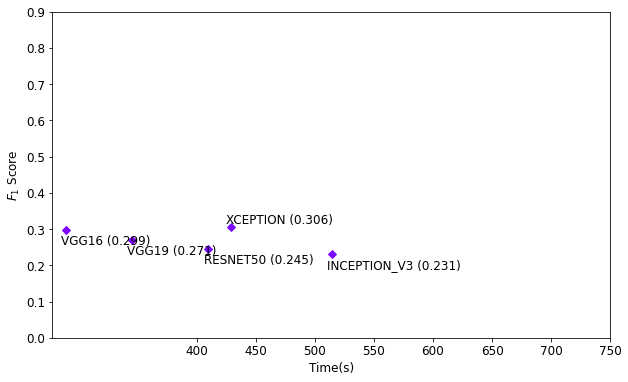

In [20]:
plt.figure(1,figsize=(10,6))
colors = [plt.cm.rainbow(x) for x in np.arange(0,df.shape[0],1)]
for i in range(df.shape[0]):
    plt.plot(df.iloc[i][-1],df.iloc[i][-2], marker='D', color=colors[i])
    if(df.iloc[i][0] == 'xception'):
        plt.annotate(fr"{df.iloc[i][0].upper()} ({np.round(df.iloc[i][-2],3)})",(df.iloc[i][-1]-4.0,df.iloc[i][-2]+0.01),fontsize=12)
    else:
        plt.annotate(fr"{df.iloc[i][0].upper()} ({np.round(df.iloc[i][-2],3)})",(df.iloc[i][-1]-4.0,df.iloc[i][-2]-0.04),fontsize=12)
plt.yticks(np.arange(0, 1, .1))
plt.xticks(np.arange(400, 800,50))
plt.ylabel(r'$F_1$ Score')
plt.xlabel('Time(s)')
# plt.grid()
plt.savefig(f'./Figures/Train_Time_{exp}.png', bbox_inches ="tight", dpi=300)
plt.show()

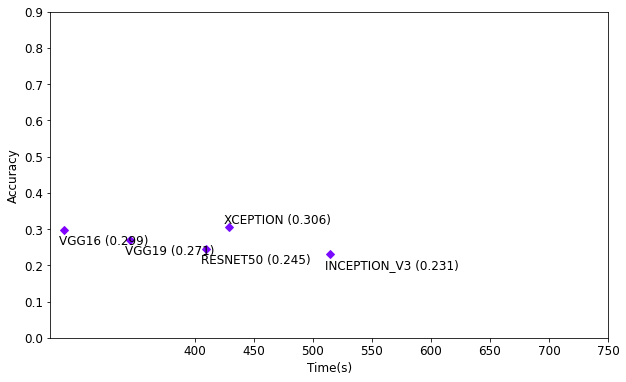

In [21]:
plt.figure(1,figsize=(10,6))
colors = [plt.cm.rainbow(x) for x in np.arange(0,df.shape[0],1)]
for i in range(df.shape[0]):
    plt.plot(df.iloc[i][-1],df.iloc[i][2], marker='D', color=colors[i])
    if(df.iloc[i][0] == 'xception'):
        plt.annotate(fr"{df.iloc[i][0].upper()} ({np.round(df.iloc[i][2],3)})",(df.iloc[i][-1]-4.0,df.iloc[i][2]+0.01),fontsize=12)
    else:
        plt.annotate(fr"{df.iloc[i][0].upper()} ({np.round(df.iloc[i][2],3)})",(df.iloc[i][-1]-4.0,df.iloc[i][2]-0.04),fontsize=12)
plt.yticks(np.arange(0, 1, .1))
plt.xticks(np.arange(400, 800,50))
plt.ylabel('Accuracy')
plt.xlabel('Time(s)')
# plt.grid()
plt.savefig(f'./Figures/Train_Time_Accuracy_{exp}.png', bbox_inches ="tight", dpi=300)
plt.show()

In [22]:
df  =  pd.read_csv('./Data/model_results_test_time.csv')
df.head()

model      loss  accuracy  f1_score        time  second
0  vgg16  1.623864  0.593750  0.593750  436.241289       1
1  vgg16  1.790916  0.364486  0.364486  226.539307       2
2  vgg16  1.815668  0.356164  0.356164  155.215458       3
3  vgg19  1.353098  0.572115  0.572115  545.496470       1
4  vgg19  1.910332  0.411215  0.411215  279.943842       2

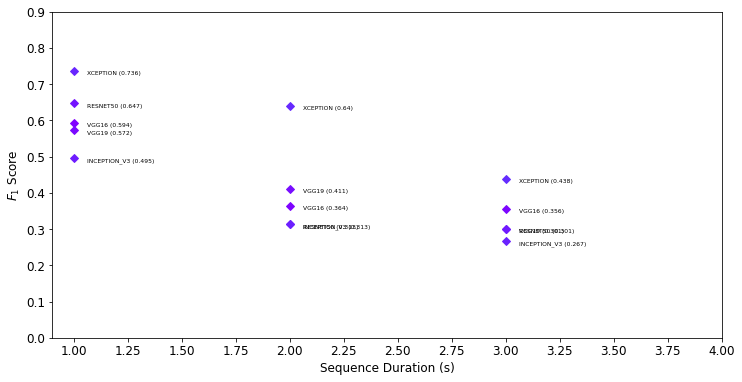

In [23]:
plt.figure(1,figsize=(12,6))
colors = [plt.cm.rainbow(x) for x in np.arange(0,df.shape[0],1)]
for i in range(df.shape[0]):
    plt.plot(df.iloc[i][-1],df.iloc[i][3], marker='D', color=colors[i])
    plt.annotate(fr"{df.iloc[i][0].upper()} ({np.round(df.iloc[i][3],3)})",(df.iloc[i][-1]+0.06,df.iloc[i][3] - 0.01),fontsize=6)
plt.yticks(np.arange(0, 1, .1))
plt.xticks(np.arange(1, 4.25,0.25))
plt.ylabel(r'$F_1$ Score')
plt.xlabel('Sequence Duration (s)')
# plt.grid()
plt.savefig(f'./Figures/Sequence_Duration_{exp}.png', bbox_inches ="tight", dpi=300)
plt.show()

In [24]:
df  =  pd.read_csv('./Data/model_results_test_variable_epochs.csv')
df.head()

model      loss  accuracy  f1_score         time  epoch
0  vgg16  2.255362  0.314236  0.314236   284.807636     20
1  vgg16  4.571652  0.267361  0.267361   571.718856     40
2  vgg16  5.714314  0.293403  0.293403   855.989398     60
3  vgg16  4.789545  0.335069  0.335069  1143.742547     80
4  vgg16  4.894605  0.371528  0.371528  1427.999001    100

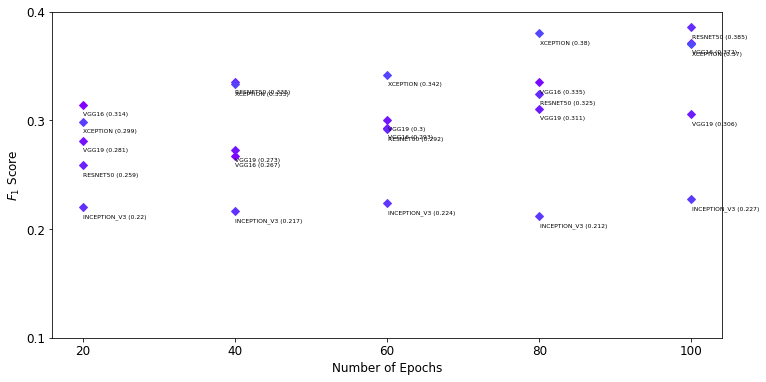

In [35]:
plt.figure(1,figsize=(12,6))
colors = [plt.cm.rainbow(x) for x in np.arange(0,df.shape[0],1)]
for i in range(df.shape[0]):
    plt.plot(df.iloc[i][-1],df.iloc[i][3], marker='D', color=colors[i])
    plt.annotate(fr"{df.iloc[i][0].upper()} ({np.round(df.iloc[i][3],3)})",(df.iloc[i][-1]+0.06,df.iloc[i][3] - 0.01),fontsize=6)
plt.yticks(np.arange(0.1, .5, .1))
plt.xticks(np.arange(20, 110,20))
plt.ylabel(r'$F_1$ Score')
plt.xlabel('Number of Epochs')
# plt.grid()
plt.savefig(f'./Figures/Sequence_Duration_{exp}.png', bbox_inches ="tight", dpi=300)
plt.show()